In [100]:
#linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [101]:
df = pd.read_csv("dataset.csv")
df.dropna(inplace=True)
df

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
...,...,...,...,...
2714,12.30,94.80,10.0,4.8
2715,24.70,94.30,40.0,4.1
2716,22.50,88.10,10.0,3.6
2717,24.60,94.20,54.0,3.5


In [102]:
#  Step 3: Set Magnitude as the target
y = df['Magnitude']

# Step 4: Select appropriate features

X = df[['Latitude', 'Longitude', 'Depth']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [104]:
print(X_train)

      Latitude  Longitude  Depth
2381     26.30      90.00   15.0
695      26.85      93.31   30.0
1407     28.25      88.06  147.0
445      32.63      76.32   14.0
998      38.94      70.85   10.0
...        ...        ...    ...
1638      6.56      92.81   10.0
1095     19.57      73.14    5.0
1130     29.74      95.78   10.0
1294     23.79      88.36   10.0
860      28.96      76.99   14.0

[2175 rows x 3 columns]


In [105]:
print(y_train)

2381    2.7
695     2.7
1407    4.3
445     2.4
998     3.5
       ... 
1638    4.8
1095    2.8
1130    4.1
1294    4.1
860     3.3
Name: Magnitude, Length: 2175, dtype: float64


In [106]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2175, 3)
X_test shape: (544, 3)
y_train shape: (2175,)
y_test shape: (544,)


In [108]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [109]:
# Step 8: Predict Magnitude
y_pred = model.predict(X_test_scaled)

In [110]:
# Step 9: Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.5546265918461963
R² Score: 0.0569427477930452


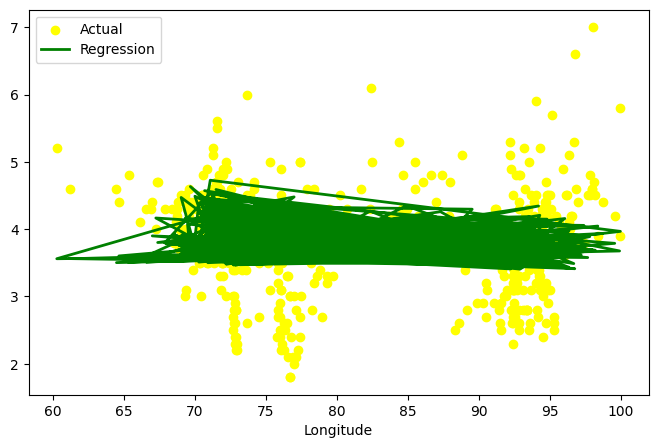

In [111]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test['Longitude'], y_test, color="yellow", label="Actual")
plt.plot(X_test['Longitude'], y_pred, color="green", linewidth=2, label="Regression")
plt.xlabel("Longitude")
plt.legend()
plt.show()

In [112]:
#logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [113]:
# Read the dataset
df = pd.read_csv('/content/dataset.csv')
df

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
...,...,...,...,...
2714,12.30,94.80,10.0,4.8
2715,24.70,94.30,40.0,4.1
2716,22.50,88.10,10.0,3.6
2717,24.60,94.20,54.0,3.5


In [114]:
# Convert regression target to classification labels
def magnitude_to_class(mag):
    if mag < 4.0:
        return 'Minor'
    elif mag < 6.0:
        return 'Moderate'
    else:
        return 'Strong'

df['Magnitude_Class'] = df['Magnitude'].apply(magnitude_to_class)

In [115]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [116]:
# Fit and transform the 'Magnitude_Class' column to create encoded labels
df['Magnitude_Class_Encoded'] = label_encoder.fit_transform(df['Magnitude_Class'])

# Features and target
X = df[['Latitude', 'Longitude', 'Depth']]
# Use the encoded 'Magnitude_Class_Encoded' column as the target variable
y = df['Magnitude_Class_Encoded']

In [117]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [118]:
print(X_train)

      Latitude  Longitude  Depth
1983     26.40      92.70   38.0
2333     20.50      93.40   25.0
147      37.47      72.60   10.0
871      26.92      92.67   10.0
2020     32.70      76.10    5.0
...        ...        ...    ...
1863     37.40      68.70   10.0
1330     39.68      73.91  165.0
2213     34.40      76.10    8.0
2055     25.60      93.40   25.0
2267     26.20      65.90   37.0

[2175 rows x 3 columns]


In [119]:
print(y_train)

1983    1
2333    1
147     0
871     0
2020    0
       ..
1863    1
1330    1
2213    0
2055    0
2267    1
Name: Magnitude_Class_Encoded, Length: 2175, dtype: int64


In [120]:
# Standardize the features
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2175, 3)
X_test shape: (544, 3)
y_train shape: (2175,)
y_test shape: (544,)


In [122]:
# Models
models = {
    'Logistic Regression':LogisticRegression(max_iter=1000)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       319
           1       0.64      0.46      0.53       224
           2       0.00      0.00      0.00         1

    accuracy                           0.67       544
   macro avg       0.44      0.43      0.43       544
weighted avg       0.66      0.67      0.66       544



In [123]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[262  57   0]
 [122 102   0]
 [  1   0   0]]


In [124]:
#svc and svr

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score

In [125]:
df['target_class'] = df['Magnitude'].apply(lambda x: 1 if x > 5 else 0)  # Example: 1 if magnitude > 5, else 0


features = ['Latitude', 'Longitude', 'Depth']
X = df[features]
y_class = df['target_class']  # For classification
y_reg = df['Magnitude']  # For regression

In [126]:
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42)

In [127]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Step 4: Build and Train the SVC Model (Classification)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train_class)


SVC(kernel='linear')

In [129]:

# Predict with the SVC model
y_pred_class = svc_model.predict(X_test_scaled)

In [130]:
# Evaluate the classification model
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {classification_accuracy}')

Classification Accuracy: 0.9632352941176471


In [131]:

# Step 5: Build and Train the SVR Model (Regression)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train_reg)

SVR(kernel='linear')

In [132]:
# Predict with the SVR model
y_pred_reg = svr_model.predict(X_test_scaled)


In [133]:
# Evaluate the regression model
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Regression Mean Squared Error: {regression_mse}')

Regression Mean Squared Error: 0.5630630661375402


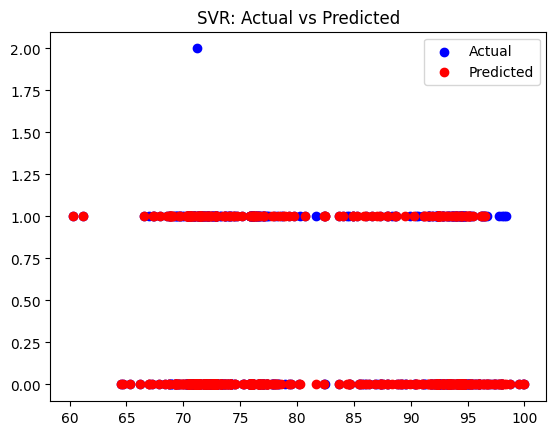

In [134]:
import matplotlib.pyplot as plt
plt.scatter(X_test['Longitude'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Longitude'], y_pred, color='red', label='Predicted')
plt.title("SVR: Actual vs Predicted")
plt.legend()
plt.show()

In [135]:
#knn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [136]:
# Load dataset
df = pd.read_csv("dataset.csv")

In [137]:
# Convert magnitude into categories
def label_magnitude(mag):
    if mag < 4.0:
        return 'low'
    elif mag < 6.0:
        return 'moderate'
    else:
        return 'high'

In [138]:
df['magnitude_category'] = df['Magnitude'].apply(label_magnitude)

In [139]:
# Features and labels
X = df[['Latitude', 'Longitude', 'Depth']]
y = df['magnitude_category']

In [140]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [143]:
# Predict
y_pred = knn.predict(X_test_scaled)

In [144]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.7371323529411765

Confusion Matrix:
 [[  0   1   3]
 [  0 204  78]
 [  0  61 197]]

Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.77      0.72      0.74       282
    moderate       0.71      0.76      0.74       258

    accuracy                           0.74       544
   macro avg       0.49      0.50      0.49       544
weighted avg       0.73      0.74      0.73       544



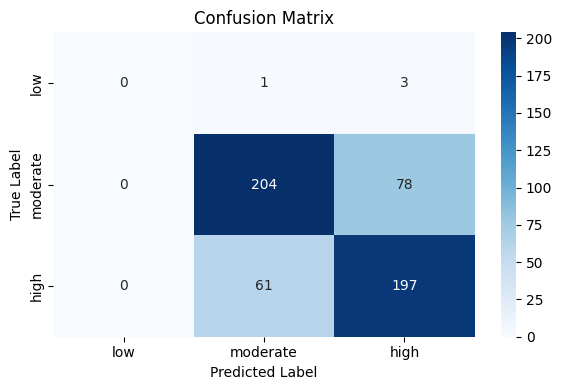

In [145]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['low', 'moderate', 'high']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()#it automatically adjust the spacing between subplots
plt.show()

In [146]:
#decision tree classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt




In [147]:
# Load your dataset
df = pd.read_csv("dataset.csv")

In [148]:

# Convert magnitude into categories
def label_magnitude(mag):
    if mag < 4.0:
        return 'low'
    elif mag < 6.0:
        return 'moderate'
    else:
        return 'high'

In [149]:
df['magnitude_category'] = df['Magnitude'].apply(label_magnitude)

In [150]:
# Features and labels
X = df[['Latitude', 'Longitude', 'Depth']]  # Use the correct column names
y = df['magnitude_category']


In [151]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [152]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [153]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [154]:

# Predict
y_pred = clf.predict(X_test_scaled)

In [155]:

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6617647058823529

Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.68      0.70      0.69       282
    moderate       0.65      0.64      0.64       258

    accuracy                           0.66       544
   macro avg       0.44      0.44      0.44       544
weighted avg       0.66      0.66      0.66       544



In [156]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['low', 'moderate', 'high']
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[  0   1   3]
 [  1 196  85]
 [  2  92 164]]


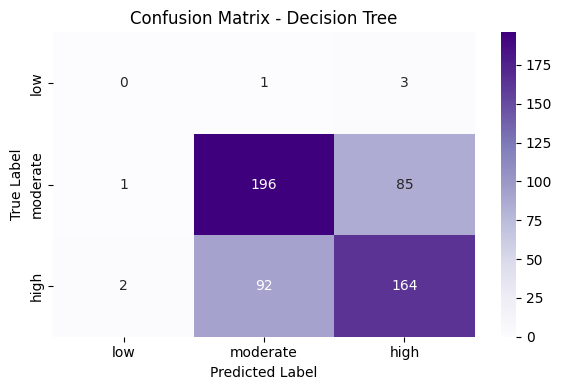

In [157]:
# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()


In [158]:
# DECISION TREE REGRESSION
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [159]:
# Load your dataset
df = pd.read_csv("dataset.csv")

In [160]:
# Features and target
X = df[['Latitude', 'Longitude', 'Depth']]

y = df['Magnitude']

In [161]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [163]:
# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [164]:
# Predict magnitudes
y_pred = regressor.predict(X_test_scaled)

In [165]:

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 0.4872204350490196
R² Score: 0.17155655453349927


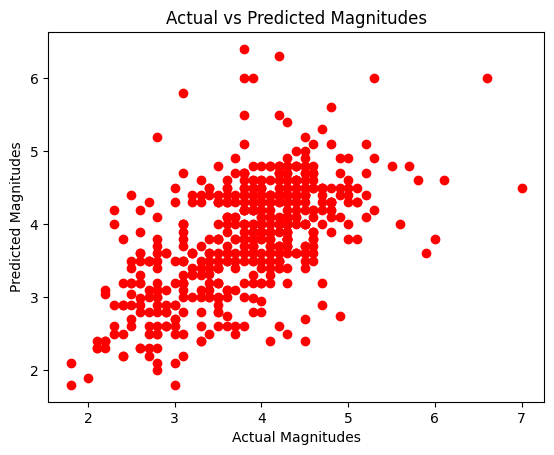

In [166]:

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('Actual vs Predicted Magnitudes')
plt.show()

In [167]:
#random forest regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [168]:

# Load your dataset
df = pd.read_csv("dataset.csv")

In [169]:

# Features and target
X = df[['Latitude', 'Longitude', 'Depth']]
y = df['Magnitude']

In [170]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [173]:
# Predict magnitudes
y_pred = rf_regressor.predict(X_test_scaled)


In [174]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.3107970916725048
R² Score: 0.4715373269591355


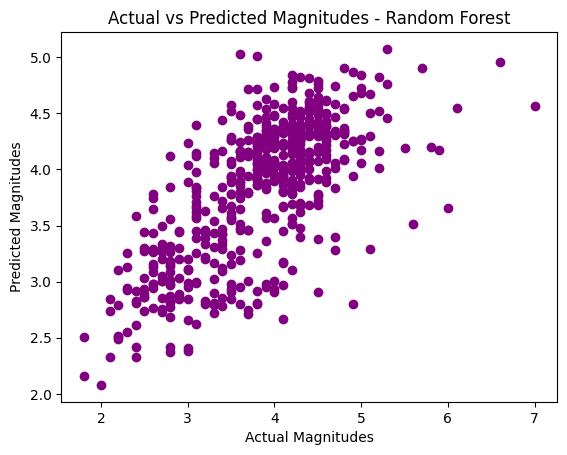

In [175]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('Actual Magnitudes')
plt.ylabel('Predicted Magnitudes')
plt.title('Actual vs Predicted Magnitudes - Random Forest')
plt.show()


In [176]:
#random forest classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt




In [177]:
# Load your dataset
df = pd.read_csv("dataset.csv")

In [178]:
# Convert magnitude into categories
def label_magnitude(mag):
    if mag < 4.0:
        return 'low'
    elif mag < 6.0:
        return 'moderate'
    else:
        return 'high'

In [179]:
df['magnitude_category'] = df['Magnitude'].apply(label_magnitude)

In [180]:

# Features and target
X = df[['Latitude', 'Longitude', 'Depth']]  # Use the correct column names

y = df['magnitude_category']


In [181]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [183]:
 #Train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [184]:
# Predict
y_pred = rfc.predict(X_test_scaled)

In [185]:

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.7389705882352942

Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.76      0.74      0.75       282
    moderate       0.72      0.75      0.73       258

    accuracy                           0.74       544
   macro avg       0.49      0.50      0.49       544
weighted avg       0.73      0.74      0.74       544



In [186]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['low', 'moderate', 'high']
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))




Confusion Matrix:
 [[  0   1   3]
 [  0 208  74]
 [  0  64 194]]


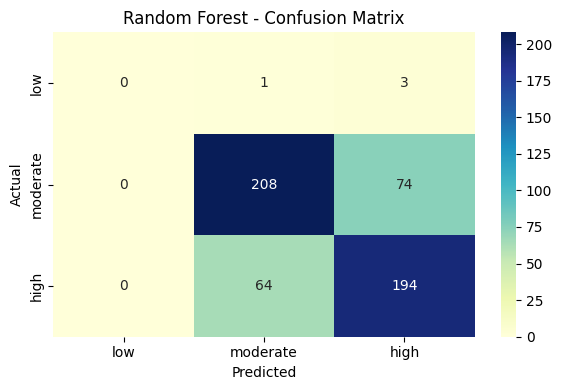

In [187]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

In [188]:
#Gradient boosting classifier
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
# 1. Load the dataset
df = pd.read_csv('/content/dataset.csv')

In [190]:
X = df[['Latitude', 'Longitude', 'Depth']]

y = df['Magnitude']


In [191]:
y_binned = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

In [193]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [194]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [195]:
y_pred = clf.predict(X_test_scaled)

In [196]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8198529411764706

Classification Report:

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        16
         Low       0.69      0.76      0.73       139
      Medium       0.87      0.87      0.87       389

    accuracy                           0.82       544
   macro avg       0.52      0.55      0.53       544
weighted avg       0.80      0.82      0.81       544



In [197]:
print("\nconfusion matrix\n",confusion_matrix(y_test,y_pred))


confusion matrix
 [[  0   0  16]
 [  0 106  33]
 [  2  47 340]]


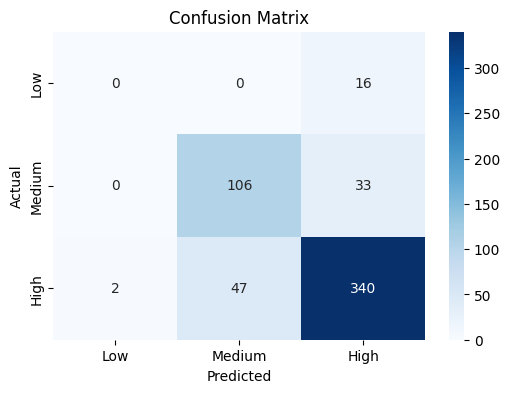

In [198]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()